In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from pandas.tools.plotting import scatter_matrix
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold,KFold,train_test_split
from keras.constraints import maxnorm
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

C:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
# load dataset
df = pd.read_csv('ENB2012_data.csv')

In [4]:
# Assign names to Columns
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [5]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
print("Statistical Description:", df.describe())

Statistical Description:        relative_compactness  surface_area   wall_area   roof_area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       overall_height  orientation  glazing_area  glazing_area_distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000   

In [7]:
print("Shape:", df.shape),print("Data Types:", df.dtypes)

Shape: (768, 10)
Data Types: relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                    int64
glazing_area                 float64
glazing_area_distribution      int64
heating_load                 float64
cooling_load                 float64
dtype: object


(None, None)

In [8]:
print("Correlation:", df.corr(method='pearson'))

Correlation:                            relative_compactness  surface_area     wall_area  \
relative_compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
surface_area                      -9.919015e-01  1.000000e+00  1.955016e-01   
wall_area                         -2.037817e-01  1.955016e-01  1.000000e+00   
roof_area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
overall_height                     8.277473e-01 -8.581477e-01  2.809757e-01   
orientation                        0.000000e+00  0.000000e+00  0.000000e+00   
glazing_area                       1.283986e-17  1.318356e-16 -7.969726e-19   
glazing_area_distribution          1.764620e-17 -3.558613e-16  0.000000e+00   
heating_load                       6.222722e-01 -6.581202e-01  4.556712e-01   
cooling_load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              roof_area  overall_height  orientation  \
relative_compactness      -8.688234e-01    8.

######  'overall_height' has the highest correlation with 'heating_load' and 'cooling_load' (which is a positive correlation),followed by 'roof_area' for both outputs which is a negative correlation, 'orientation' has the least correlation

In [9]:
X = df.iloc[:,0:8].values
Y1 = df.iloc[:,8].values
Y2 = df.iloc[:,9].values

In [24]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [25]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y1)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False  True  True  True False False False]
Feature Ranking:  [4 3 1 1 1 6 2 5]


######  'wall_area', 'roof_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'heating_load' using Recursive Feature Elimination, the 2nd and 3rd selected features were atually among the attributes with the highest correlation with the 'heating_load'

In [26]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y2)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Number of Features:  3
Selected Features:  [ True False  True False  True False False False]
Feature Ranking:  [1 3 1 6 1 5 2 4]


### 'wall_area', 'glazing_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'cooling_load' using Recursive Feature Elimination

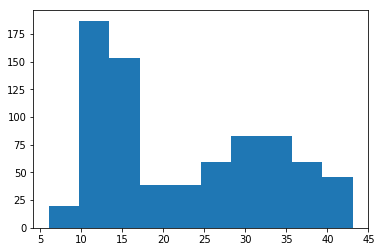

In [27]:
plt.hist((df.heating_load))
plt.show()

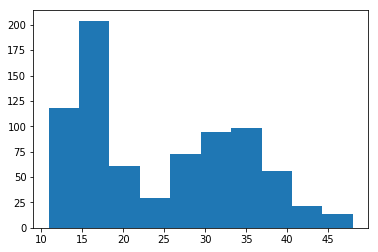

In [28]:
plt.hist((df.cooling_load))
plt.show()

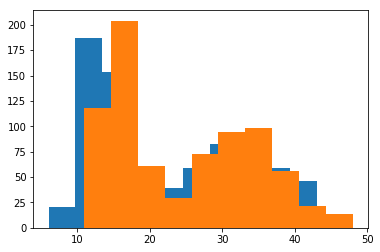

In [29]:
plt.hist((df.heating_load))
plt.hist((df.cooling_load))
plt.show()

### Most of the dataset's samples fall between 10 and 20 of both 'heating_load' and 'cooling_load' regressional output classes, with a positive skew

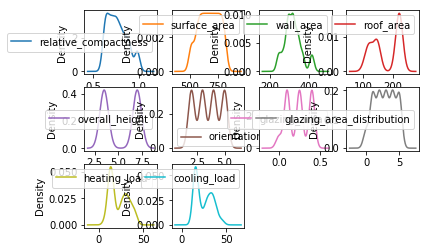

In [30]:
df.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

### Majority of the features have a positive skew except for a few, 'oreintation' and 'overall_height' have quite even distribution

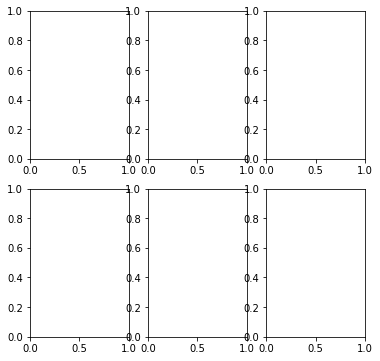

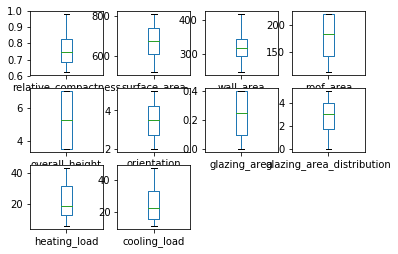

In [31]:
axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))
df.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

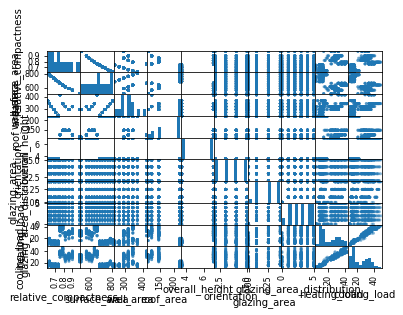

In [32]:
scatter_matrix(df)
plt.show()

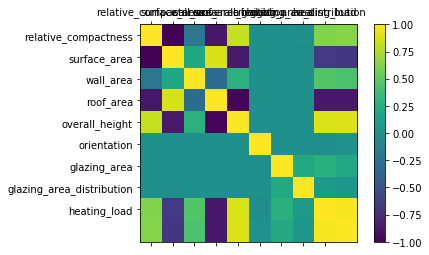

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [34]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y1)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X, Y1, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LiR: 0.894333 (0.064481)
Ridge: 0.892568 (0.065759)
Lasso: 0.716059 (0.150407)
ElasticNet: 0.483854 (0.107620)
Bag_Re: 0.968888 (0.083021)
RandomForest: 0.969288 (0.082376)
ExtraTreesRegressor: 0.969104 (0.082368)
KNN: 0.933476 (0.086240)
CART: 0.968717 (0.082255)
SVR: 0.888900 (0.062886)


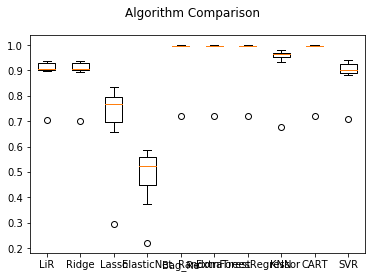

In [35]:
#boxplot algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [36]:
# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y2)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    kfold = cross_validation.KFold(n=num_instances, n_folds=10, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X, Y2, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LiR: 0.876680 (0.032994)
Ridge: 0.874094 (0.033470)
Lasso: 0.736884 (0.070162)
ElasticNet: 0.493588 (0.054133)
Bag_Re: 0.959822 (0.026995)
RandomForest: 0.961132 (0.025952)
ExtraTreesRegressor: 0.950634 (0.022206)
KNN: 0.930119 (0.032430)
CART: 0.954563 (0.020515)
SVR: 0.859375 (0.030952)


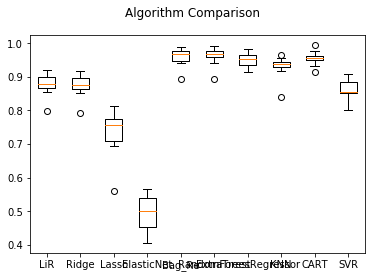

In [37]:
#boxplot algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###### 'Random Forest' and 'Bagging Regressor' are the best estimators/models for 'cooling_load', they can be further explored and their hyperparameters tuned. 

###### We will now build regressor models using neural network for Y2 - Target Value

In [38]:
X = sc.fit_transform(X)
# Define 10-fold Cross Valdation Test Harness
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y2):
    
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y2[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y2[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
    
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

score: 97.52%
score: 97.70%
score: 97.47%
97.47% (+/- 0.00%)


###### We will now build regressor models using neural network for Y1 - Target Value

In [39]:
# Define 10-fold Cross Valdation Test Harness
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y1):
    
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y1[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y1[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
    
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

score: 98.13%
score: 97.77%
score: 98.23%
98.23% (+/- 0.00%)


###### We now create a new target variable by combining both heating load and cooling code & assign it as the new Y variable.

In [40]:
df['total_load'] = df['heating_load'] + df['cooling_load']
Y = df.iloc[:,10].values

###### Running the regressor NN model for the new variable 

In [41]:
# Define 10-fold Cross Valdation Test Harness
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
    
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

score: 94.19%
score: 96.14%
score: 94.88%
94.88% (+/- 0.00%)


# Creating a new variable with Classes 

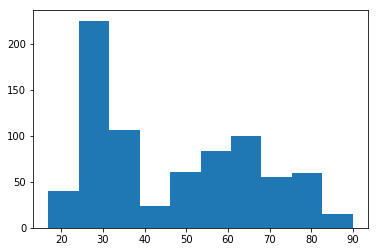

In [42]:
# Creating a histogram to see distribution. 
plt.hist((df.total_load))
plt.show()

In [43]:
#set up bins
bin = [0,40,70,100]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(df.total_load,bin)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
df_new = pd.concat([df,category],axis = 1)
category


,range
0,"(0, 40]"
1,"(0, 40]"
2,"(0, 40]"
3,"(0, 40]"
4,"(40, 70]"
5,"(40, 70]"
6,"(40, 70]"
7,"(40, 70]"
8,"(40, 70]"
9,"(40, 70]"


In [44]:
df_new.dtypes

relative_compactness          float64
surface_area                  float64
wall_area                     float64
roof_area                     float64
overall_height                float64
orientation                     int64
glazing_area                  float64
glazing_area_distribution       int64
heating_load                  float64
cooling_load                  float64
total_load                    float64
range                        category
dtype: object

In [45]:
df_new.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,total_load,range
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,"(0, 40]"
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,"(0, 40]"
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,"(0, 40]"
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,"(0, 40]"
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,"(40, 70]"


In [46]:
Y_new = df_new.iloc[:,11].values
#Y_new = pd.get_dummies(Y_new)
#Y_new
X = df_new.iloc[:,0:8].values
X = sc.fit_transform(X)

In [47]:
# One hot encoding the variables to for the multovalss variable.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y_new)
encoded_Y = encoder.transform(Y_new)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [48]:
# Creating Test and Training datat set 
X_train, X_test, y_train, y_test = train_test_split(X,dummy_y, test_size = 0.05, random_state = 10)

In [50]:
# Classification Model 
# create model
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fitting the model
clf_nn = model.fit(X_train,y_train,epochs=300,batch_size=10)

Epoch 1/300
729/729 [==============================] - 1s 836us/step - loss: 0.9842 - acc: 0.4911
Epoch 2/300
729/729 [==============================] - 0s 168us/step - loss: 0.8744 - acc: 0.5679
Epoch 3/300
729/729 [==============================] - 0s 186us/step - loss: 0.7451 - acc: 0.7682
Epoch 4/300
729/729 [==============================] - 0s 177us/step - loss: 0.6325 - acc: 0.8230
Epoch 5/300
729/729 [==============================] - 0s 164us/step - loss: 0.5454 - acc: 0.8258
Epoch 6/300
729/729 [==============================] - 0s 177us/step - loss: 0.4900 - acc: 0.8258
Epoch 7/300
729/729 [==============================] - 0s 208us/step - loss: 0.4600 - acc: 0.8258
Epoch 8/300
729/729 [==============================] - 0s 173us/step - loss: 0.4421 - acc: 0.8258
Epoch 9/300
729/729 [==============================] - 0s 173us/step - loss: 0.4291 - acc: 0.8258
Epoch 10/300
729/729 [==============================] - 0s 182us/step - loss: 0.4201 - acc: 0.8258
Epoch 11/300
729/72

Epoch 165/300
729/729 [==============================] - 0s 167us/step - loss: 0.0834 - acc: 0.9726
Epoch 166/300
729/729 [==============================] - 0s 154us/step - loss: 0.0830 - acc: 0.9698
Epoch 167/300
729/729 [==============================] - 0s 176us/step - loss: 0.0826 - acc: 0.9712
Epoch 168/300
729/729 [==============================] - 0s 136us/step - loss: 0.0796 - acc: 0.9726
Epoch 169/300
729/729 [==============================] - 0s 115us/step - loss: 0.0821 - acc: 0.9712
Epoch 170/300
729/729 [==============================] - 0s 114us/step - loss: 0.0818 - acc: 0.9712
Epoch 171/300
729/729 [==============================] - 0s 140us/step - loss: 0.0825 - acc: 0.9712
Epoch 172/300
729/729 [==============================] - 0s 181us/step - loss: 0.0810 - acc: 0.9726
Epoch 173/300
729/729 [==============================] - 0s 159us/step - loss: 0.0805 - acc: 0.9712
Epoch 174/300
729/729 [==============================] - 0s 159us/step - loss: 0.0817 - acc: 0.9698


In [52]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train r2: 0.94
Test r2: 0.89


In [53]:
scores = model.evaluate(X_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

729/729 [==============================] - 0s 228us/step

acc: 97.26%


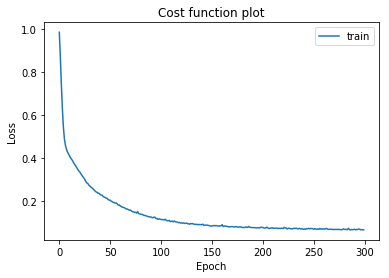

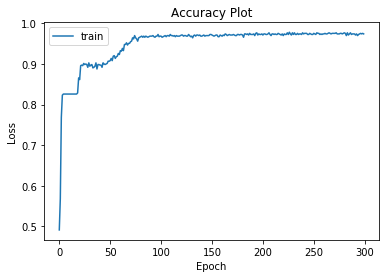

In [54]:
# Plotting the Cost Function - Loss 
plt.plot(clf_nn.history['loss'])
plt.title('Cost function plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# plotting the accuracy 
plt.plot(clf_nn.history['acc'])
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='Lower right')
plt.show()

After running the Classification model using Keras we can observe that the accuracy is high. Almost 97.26% for our training and test set.

### Thank you!